In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from tabulate import tabulate
from pydataset import data 
from math import sqrt 
from env import host, user, password, get_db_url
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import tfplot
import os
import acquire 
import prepare
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

np.random.seed(123)

In [ ]:

iris_df = pd.read_csv (r'/Users/christophercurran/codeup-data-science/classification-exercises/iris.csv')
print(iris_df.head(3))
print('number of rows and columns:',iris_df.shape)
print('column names:', iris_df.columns)
print('data type:', iris_df.columns.dtype)
print(iris_df.describe())


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/18FOmTMu95L3R_PfcPICXyn1aU6iS1eX_VThGUBjYTcc/export?format=csv#gid=1023018493'

df_google_sheets = pd.read_csv(url)
df_google_sheets_sample = pd.read_csv(url).head(101)

In [ ]:
print(df_google_sheets.shape)
print(df_google_sheets.dtypes)
print(df_google_sheets.columns[:5])
# print only data types selected in columns
print(list(df_google_sheets.select_dtypes(['object']))) 
print(df_google_sheets.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))


Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). 

Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel (r'/Users/christophercurran/codeup-data-science/classification-exercises/innis_spreadsheet_exercises.xlsx')
df_excel_sample = pd.read_excel (r'/Users/christophercurran/codeup-data-science/classification-exercises/innis_spreadsheet_exercises.xlsx').head(101)

In [ ]:
print(df_excel.shape)
print(df_excel.dtypes)
print(df_excel.columns[:5])
print(tabulate(df_excel.select_dtypes(['object']), headers = 'keys', tablefmt = 'psql'))
print(df_excel.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))


Read the data from this google sheet into a dataframe, df_google

In [ ]:
df_google = pd.read_csv(r'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv#gid=341089357')
print(df_google.head(3))
print(df_google.shape)
print(df_google.columns)
print(df_google.dtypes)
print(df_google.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))
print(df_google.select_dtypes(['object']).apply(lambda col: col.unique().tolist()))





In [ ]:
print(df_google.nunique())

# Data Preparation Exercises

# Using the Iris Data

In [85]:
iris_df = acquire.get_iris_data()
iris_df.head()



Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [86]:
columns_to_drop = ['species_id','measurement_id']
iris_dropped = iris_df.drop(columns = columns_to_drop)
iris_dropped.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
iris_rename = iris_dropped.rename(columns={'species_name': 'species'})
iris_rename

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [14]:
iris_rename.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dummy_iris = pd.get_dummies(iris_df[['species_name']], dummy_na = False ,drop_first = [True, True])
df_iris = pd.concat([iris_rename, dummy_iris], axis=1)
df_iris.head()


In [10]:
df = acquire.get_iris_data()


Reading from csv file...


In [11]:

def prep_iris(df):
    df = df.drop(columns = ['species_id','measurement_id'])
    dummy_df = pd.get_dummies(df[['species_name']], dummy_na = False , drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.rename(columns={'species_name': 'species'})

    


In [20]:
iris_clean = prep_iris(df)
iris_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name_versicolor,species_name_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Using the Titanic dataset

In [ ]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

In [ ]:
titanic_df.drop_duplicates(inplace=True)

In [ ]:
titanic_df = titanic_df.drop(columns=['deck', 'age', 'embarked', 'class'])


In [ ]:
titanic_df.shape

In [ ]:
titanic_df.embark_town.fillna(value='Southampton')

In [ ]:
titanic_df.isnull().sum()

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False ,drop_first = [True, True])
dummy_df

In [ ]:
df = pd.concat([titanic_df, dummy_df], axis=1)
df


In [ ]:
df.drop(columns=['sex', 'embark_town'])


In [ ]:
df = acquire.get_titanic_data()

In [ ]:
def prep_titanic(df):
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

In [ ]:
clean_titanic_data_v1 = prep_titanic(df)
clean_titanic_data_v1

# Using the Telco dataset

In [2]:
df = acquire.get_telco_data()

Reading from csv file...


In [3]:
df_drop = df.drop(df.columns.difference(['gender', 'payment_type_id', 'monthly_charges', 'total_charges', 'tenure','churn','contract_type_id', 'internet_service_type_id'], sort = False), axis=1)
df_drop


,payment_type_id,contract_type_id,internet_service_type_id,gender,tenure,monthly_charges,total_charges,churn
0,2,2,1,Female,9,65.60,593.3,No
1,2,1,1,Male,9,59.90,542.4,No
2,1,1,2,Male,4,73.90,280.85,Yes
3,1,1,2,Male,13,98.00,1237.85,Yes
4,2,1,2,Female,3,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...
7038,2,2,1,Female,13,55.15,742.9,No
7039,1,1,2,Male,22,85.10,1873.7,Yes
7040,2,1,1,Male,2,50.30,92.75,No
7041,2,3,1,Male,67,67.85,4627.65,No


In [6]:
df_drop.melt(id_vars = ['contract_type_id'])

,contract_type_id,variable,value
0,2,payment_type_id,2
1,1,payment_type_id,2
2,1,payment_type_id,1
3,1,payment_type_id,1
4,1,payment_type_id,2
...,...,...,...
49296,2,churn,No
49297,1,churn,Yes
49298,1,churn,No
49299,3,churn,No


In [6]:
df_drop

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,tenure,monthly_charges,total_charges
0,2,2,1,0002-ORFBO,Female,9,65.60,593.3
1,2,1,1,0003-MKNFE,Male,9,59.90,542.4
2,1,1,2,0004-TLHLJ,Male,4,73.90,280.85
3,1,1,2,0011-IGKFF,Male,13,98.00,1237.85
4,2,1,2,0013-EXCHZ,Female,3,83.90,267.4
...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,13,55.15,742.9
7039,1,1,2,9992-RRAMN,Male,22,85.10,1873.7
7040,2,1,1,9992-UJOEL,Male,2,50.30,92.75
7041,2,3,1,9993-LHIEB,Male,67,67.85,4627.65


In [ ]:
dummy_df = pd.get_dummies(df_drop[['sex', 'embark_town']], dummy_na = False ,drop_first = [True, True])


# exploratory analysis
section 1 - iris_db

    1. Acquire, prepare & split your data.

    2. Univariate Stats

        For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

        For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

        Document takeaways & any actions.

    3. Bivariate Stats

        Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

        For each measurement type, compute the descriptive statistics for each species.

        For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same 
        for the other measurement types.

        Document takeaways & any actions.

    4. Multivariate Stats

        Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

        Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

        Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. 
        Document takeaways from this visualization.

        Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. 
        If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

        Document takeaways and any actions.


In [88]:
df = acquire.get_iris_data()
df.describe()


Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [92]:
df = df.drop_duplicates()
df.shape

(150, 7)

In [97]:
iris_clean = prepare.prep_iris(df)
iris_clean.nunique()


sepal_length               35
sepal_width                23
petal_length               43
petal_width                22
species                     3
species_name_versicolor     2
species_name_virginica      2
dtype: int64

In [ ]:
train_iris = prepare.train_validate_test_split(iris_clean,'species', seed=123)
train_iris

In [136]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(iris_clean, target='species')
train.shape, validate.shape, test.shape


((84, 7), (36, 7), (30, 7))

In [131]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


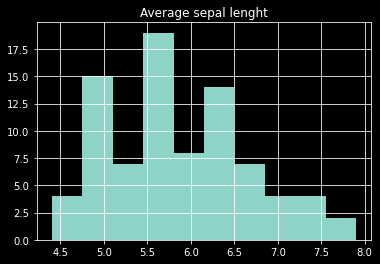

In [132]:
plt.title('Average sepal lenght')
train.sepal_length.hist()
plt.show()

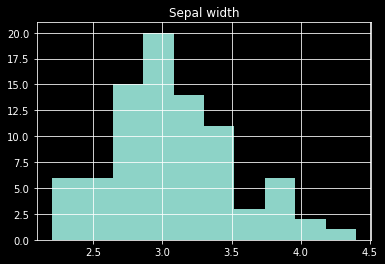

In [133]:
plt.title('Sepal width')
train.sepal_width.hist() 
plt.show()

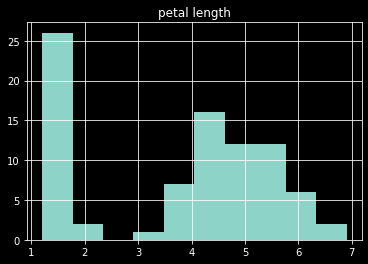

In [137]:
plt.title('petal length')
train.petal_length.hist() 
plt.show()

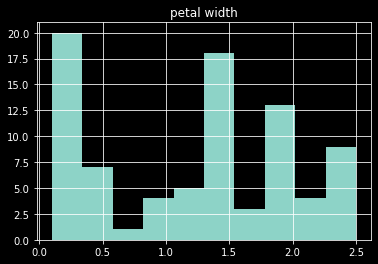

In [135]:
plt.title('petal width')
train.petal_width.hist() 
plt.show()

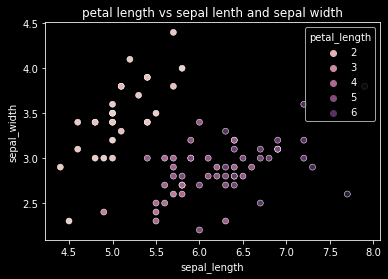

In [154]:
plt.title('petal length vs sepal lenth and sepal width')
sns.scatterplot(data=train, x=train.sepal_length, y= train.sepal_width, hue=train.petal_length)
plt.show()

takeaway: between 5.5 and 6.5 has a higher frequency of relationship between petal length and sepal length

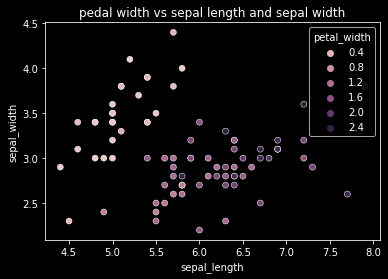

In [155]:
plt.title('pedal width vs sepal length and sepal width')
sns.scatterplot(data=train, x=train.sepal_length, y= train.sepal_width, hue=train.petal_width)
plt.show()

takeaway: there seems to be a weak relationship between petal width and sepal length 

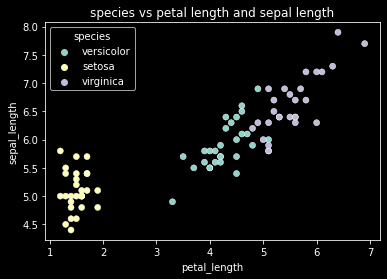

In [156]:
plt.title('species vs petal length and sepal length')
sns.scatterplot(data=train, x=train.petal_length, y= train.sepal_length, hue=train.species)
plt.show()

takeaway: with the specie "setosa" there seems to a weak relationship between petal length and sepal length. there is a strong relationship between petal length and sepal length with specie "versicolor" and specie "virginica". 

In [183]:
columns = ['species_name_virginica', 'species_name_versicolor']
train_drop = train.drop(columns = columns)
train_drop.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [230]:
train_melt = train_drop.melt(id_vars=['species'])
train_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


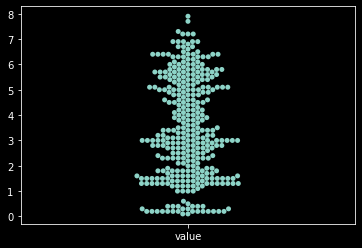

In [232]:
sns.swarmplot(data=train_melt)
plt.show()

In [145]:
train.pivot_table(columns='species')

species,setosa,versicolor,virginica
petal_length,1.507143,4.271429,5.535714
petal_width,0.275000,1.314286,2.021429
sepal_length,5.089286,5.896429,6.625000
sepal_width,3.467857,2.796429,2.960714
species_name_versicolor,0.000000,1.000000,0.000000
species_name_virginica,0.000000,0.000000,1.000000


In [128]:
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
species,,,,,,
setosa,5.089286,3.467857,1.507143,0.275000,0.0,0.0
versicolor,5.896429,2.796429,4.271429,1.314286,1.0,0.0
virginica,6.625000,2.960714,5.535714,2.021429,0.0,1.0


Takeaways: 

Null Hypothsis: petal length and septal length are independent
Hypothesis: there is a relationship between the petel length and septal length 

In [152]:
p=0.95
alpha = 0.05
observed = pd.crosstab(train.petal_length, train.sepal_length)

chi2, p, degf, expected = stats.chi2_contingency(observed)



In [153]:
p < alpha

True

We reject the the null hypothesis and there is sufficient evidence to move forward.